# Thesis Figures for Integer Partitions

## Setup

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pathlib import Path

convert thesis `\textwidth` of 418 pt to inches

In [2]:
width = 418 / 72.27

set theme for thesis

In [3]:
sns.set_theme('paper', 'ticks', rc={"text.usetex": True, "font.family": "serif"})

set path for figures and read `csv` to get a `DataFrame`

In [4]:
figs = Path('../../figs')

In [5]:
df = pd.read_csv("../../data/partition.csv", comment='#', converters={"rates": lambda x: np.fromstring(x[1:-1], dtype=int, sep=' ')})

## Prepare `DataFrame`

In [6]:
df['n'] = df['rates'].apply(len)

In [7]:
df['h'] = df['rates'].apply(np.sum)

In [8]:
df['cycle-end'] = df['cycle-start'] + df['cycle-length']

In [9]:
df['norm_backlog'] = df['backlog'] / df['h']

In [10]:
df['norm_rates'] = df['rates'] / df['h']

In [11]:
df['std'] = df['norm_rates'].apply(np.std)

In [12]:
df['min'] = df['norm_rates'].apply(np.min)

In [13]:
df['max'] = df['norm_rates'].apply(np.max)

In [14]:
df['nunique'] = df['norm_rates'].apply(lambda x: len(np.unique(x)))

In [15]:
df['norm_rates_str'] = df['norm_rates'].astype("string")

In [16]:
df['diff-backlog'] = df.groupby(by='norm_rates_str', group_keys=False)['norm_backlog'].apply(lambda x: x - x.min())

In [17]:
df['diff-cycle-start'] = df.groupby(by='norm_rates_str', group_keys=False)['cycle-start'].apply(lambda x: x - x.min())

In [18]:
df['diff-cycle-length'] = df.groupby(by='norm_rates_str', group_keys=False)['cycle-length'].apply(lambda x: x - x.min())

In [19]:
df['best-backlog'] = df['diff-backlog'] == 0

In [20]:
df_dr = df[(~df.duplicated(['strategy', 'norm_rates_str'])) & (df['n']>1)]

## Figures

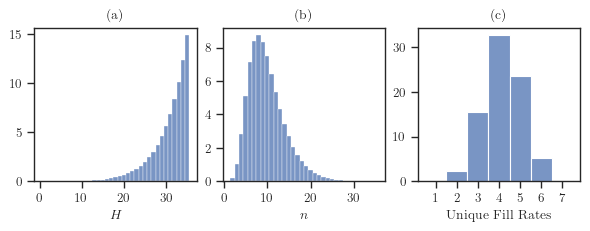

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(width, 2.2), layout='constrained')
sns.histplot(data=df[df['strategy'] == 'RM'], x='h', discrete=True, ax=ax1)
sns.histplot(data=df_dr[df_dr['strategy'] == 'RM'], x='n', discrete=True, ax=ax2)
sns.histplot(data=df_dr[df_dr['strategy'] == 'RM'], x='nunique', discrete=True, ax=ax3)
ax1.set(xlabel='$H$', ylabel=None, title='(a)')
ax2.set(xlabel='$n$', ylabel=None, title='(b)')
ax3.set(xlabel='Unique Fill Rates', xticks=list(range(1, 8)), ylabel=None, title='(c)')
for ax in (ax1, ax2, ax3):
    ax.yaxis.set_major_formatter(lambda x, pos: int(x/1000))
plt.savefig(figs / 'partitions-distribution.pdf')

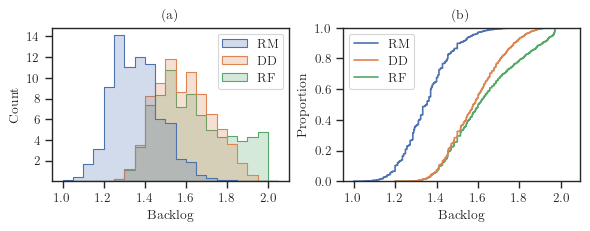

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(width, 2.2), layout='constrained')
bins = np.arange(22) / 20 + 1
sns.histplot(data=df_dr, x='norm_backlog', hue='strategy', element='step', bins=bins, ax=ax1)
sns.ecdfplot(data=df_dr, x='norm_backlog', hue='strategy', ax=ax2)
ax1.set(title='(a)', xlabel='Backlog', yticks=[2000, 4000, 6000, 8000, 10000, 12000, 14000])
ax2.set(title='(b)', xlabel='Backlog')
ax1.yaxis.set_major_formatter(lambda x, pos: int(x/1000))
ax1.get_legend().set_title(False)
ax2.get_legend().set_title(False)
plt.savefig(figs / 'partitions-distribution-backlog.pdf')

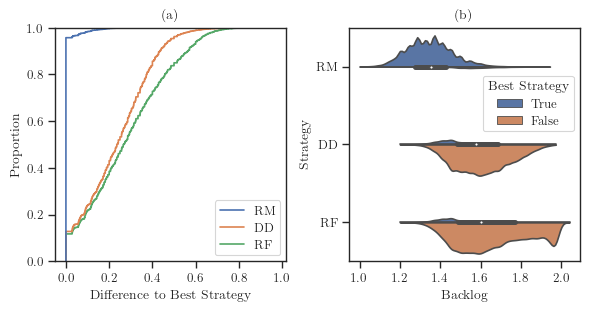

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(width, 3), layout='constrained')
sns.ecdfplot(data=df_dr, x='diff-backlog', hue='strategy', ax=ax1)
sns.violinplot(data=df_dr, x='norm_backlog', y='strategy', hue='best-backlog', hue_order=[True, False], split=True, cut=0, scale='count', ax=ax2)
ax1.set(xlabel='Difference to Best Strategy', title='(a)')
ax2.set(xlabel='Backlog', ylabel='Strategy', title='(b)')
sns.move_legend(ax1, 'lower right')
ax1.get_legend().set_title(False)
ax2.get_legend().set(title="Best Strategy", bbox_to_anchor=(1, .82))
plt.savefig(figs / 'partitions-ecdf-diff-backlog.pdf')

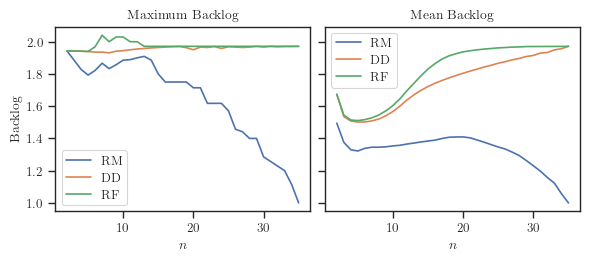

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(width, 2.5), sharey=True, layout='constrained')
sns.lineplot(data=df_dr.groupby(['n', 'strategy'], sort=False).agg({'norm_backlog': 'max'}), x='n', y='norm_backlog', hue='strategy', ax=ax1)
sns.lineplot(data=df_dr.groupby(['n', 'strategy'], sort=False).agg({'norm_backlog': 'mean'}), x='n', y='norm_backlog', hue='strategy', ax=ax2)
ax1.set(title='Maximum Backlog', ylabel='Backlog', xlabel='$n$')
ax2.set(title='Mean Backlog', xlabel='$n$')
ax1.get_legend().set(title=False)
ax2.get_legend().set(title=False)
plt.savefig(figs / 'partitions-line-backlog-n.pdf')

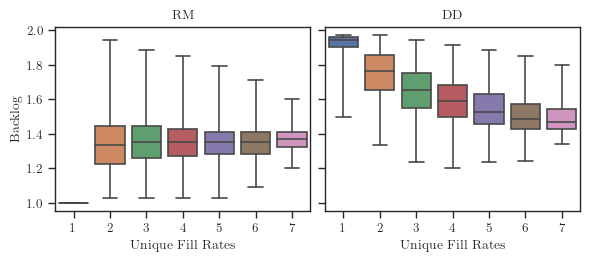

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(width, 2.5), sharey=True, layout='constrained')
sns.boxplot(data=df_dr[df_dr['strategy'] == 'RM'], x='nunique', y='norm_backlog', whis=(0, 100), ax=ax1)
sns.boxplot(data=df_dr[df_dr['strategy'] == 'DD'], x='nunique', y='norm_backlog', whis=(0, 100), ax=ax2)
ax1.set(title='RM', xlabel='Unique Fill Rates', ylabel='Backlog')
ax2.set(title='DD', xlabel='Unique Fill Rates', ylabel=None)
plt.savefig(figs / 'partitions-boxen-backlog-nunique.pdf')

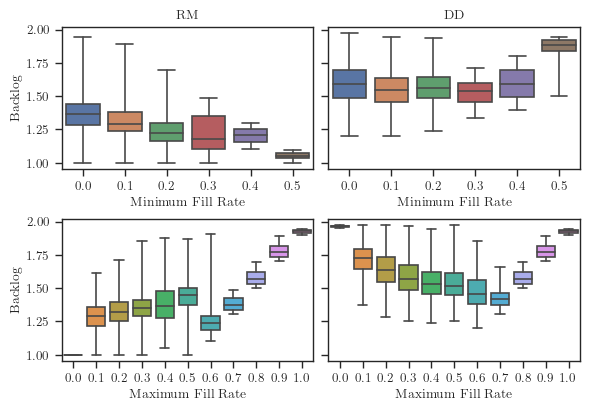

In [26]:
df_dr_round = df_dr.round({'min': 1, 'max': 1})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(width, 4), layout='constrained', sharey=True)
sns.boxplot(df_dr_round[df_dr_round['strategy'] == 'RM'], x='min', y='norm_backlog', whis=(0,100), ax=ax1)
sns.boxplot(df_dr_round[df_dr_round['strategy'] == 'DD'], x='min', y='norm_backlog', whis=(0,100), ax=ax2)
sns.boxplot(df_dr_round[df_dr_round['strategy'] == 'RM'], x='max', y='norm_backlog', whis=(0,100), ax=ax3)
sns.boxplot(df_dr_round[df_dr_round['strategy'] == 'DD'], x='max', y='norm_backlog', whis=(0,100), ax=ax4)
for ax in (ax1, ax3):
    ax.set_ylabel('Backlog')
for ax in (ax2, ax4):
    ax.set_ylabel(None)
for ax in (ax1, ax2):
    ax.set_xlabel('Minimum Fill Rate')
for ax in (ax3, ax4):
    ax.set_xlabel('Maximum Fill Rate')
ax1.set_title('RM')
ax2.set_title('DD')
plt.savefig(figs / 'partitions-boxen-min-max.pdf')

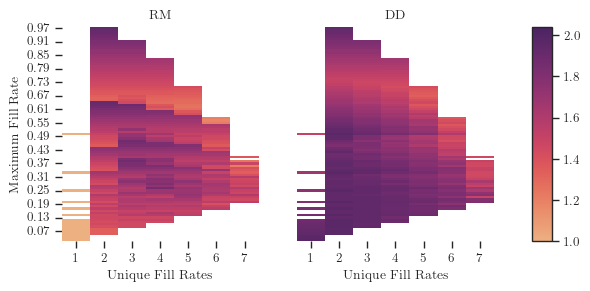

In [27]:
pt_df = df_dr.round({'max': 2}).pivot_table(index=['strategy', 'max'], columns='nunique', values='norm_backlog', aggfunc=np.max).iloc[::-1]
vmin = np.nanmin(pt_df.values)
vmax = np.nanmax(pt_df.values)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, gridspec_kw={'width_ratios': [1,1,0.1], 'wspace': 0.2}, figsize=(width, 2.8), layout='constrained')
sns.heatmap(pt_df.loc['RM'], cmap='flare', ax=ax1, vmin=vmin, vmax=vmax, cbar=False, linewidths=0)
sns.heatmap(pt_df.loc['DD'], cmap='flare', ax=ax2, vmin=vmin, vmax=vmax, cbar=False, yticklabels=False)
ax1.set(title="RM", xlabel='Unique Fill Rates', ylabel='Maximum Fill Rate')
ax2.set(title="DD", xlabel='Unique Fill Rates', ylabel=None)
fig.colorbar(ax2.collections[0], cax=ax3)
plt.savefig(figs / 'partitions-heatmap-nunique-max.pdf')

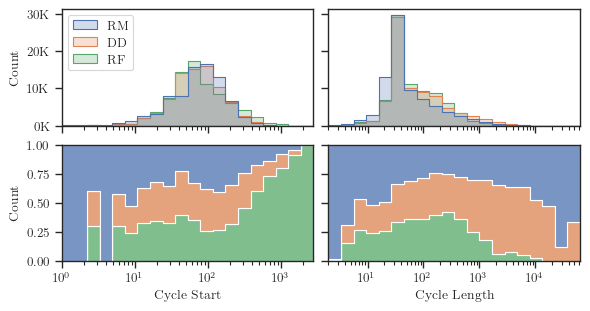

In [28]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(width, 3), layout='constrained', sharex='col', sharey='row')
sns.histplot(data=df_dr, x='cycle-start', hue='strategy', element='step', log_scale=True, bins=20, legend=True, ax=ax1)
sns.histplot(data=df_dr, x='cycle-length', hue='strategy', element='step', log_scale=True, bins=20, legend=False, ax=ax2)
sns.histplot(data=df_dr, x='cycle-start', hue='strategy', multiple='fill', element='step', log_scale=True, bins=20, legend=False, ax=ax3)
sns.histplot(data=df_dr, x='cycle-length', hue='strategy', multiple='fill', element='step', log_scale=True, bins=20, legend=False, ax=ax4)
ax1.yaxis.set_major_formatter(lambda x, pos: f"{int(x/1000)}K")
sns.move_legend(ax1, 'upper left', title=None)
ax3.set(xlabel='Cycle Start')
ax4.set(xlabel='Cycle Length')
plt.savefig(figs / 'partitions-cycle-stats.pdf')

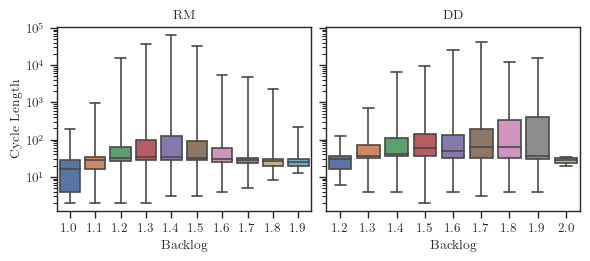

In [29]:
df_dr_round = df_dr.round({'norm_backlog': 1})
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(width, 2.5), layout='constrained', sharey=True)
sns.boxplot(data=df_dr_round[df_dr_round['strategy'] == 'RM'], x='norm_backlog', y='cycle-length', whis=(0, 100), ax=ax1)
sns.boxplot(data=df_dr_round[df_dr_round['strategy'] == 'DD'], x='norm_backlog', y='cycle-length', whis=(0, 100), ax=ax2)
for ax in (ax1, ax2):
    ax.set(yscale='log')
ax1.set(xlabel='Backlog', title='RM', ylabel='Cycle Length')
ax2.set(xlabel='Backlog', title='DD', ylabel=None)
plt.savefig(figs / 'partitions-backlog-cycle.pdf')

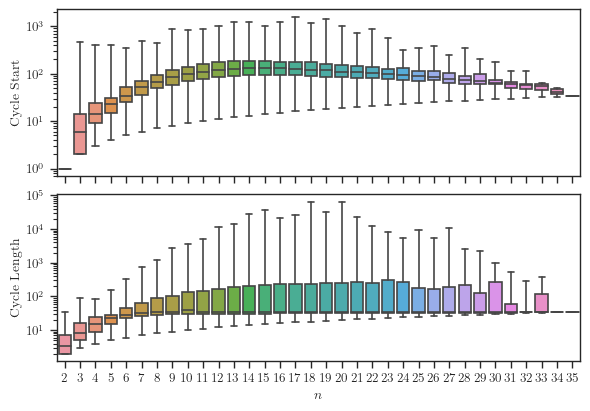

In [30]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(width, 4), layout='constrained', sharex=True)
sns.boxplot(data=df_dr[df_dr['strategy'] == 'RM'], x='n', y='cycle-start', whis=(0,100), ax=ax1)
sns.boxplot(data=df_dr[df_dr['strategy'] == 'RM'], x='n', y='cycle-length', whis=(0,100), ax=ax2)
for ax in (ax1, ax2):
    ax.set(yscale='log')
ax1.set(xlabel=None, ylabel='Cycle Start')
ax2.set(xlabel='$n$', ylabel='Cycle Length')
plt.savefig(figs / 'partitions-n-cycle.pdf')